## Add labels and check out the data

(10999999, 29)
class                       0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64
class                       float64
lepton pT                   float64
lepton eta                  fl

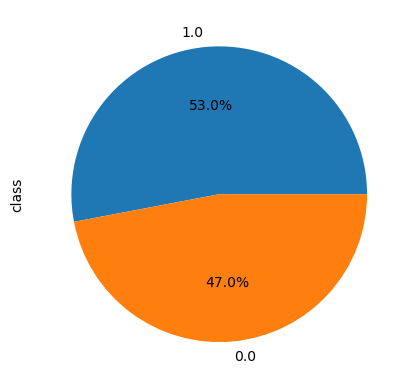

In [2]:
# Initial dataset analysis and data splitting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('HIGGSdata.csv')
# column labels. There are 28 columns in the dataset. We may be able to reduce the dimensionality of the dataset later on.
# The first column is the class label. The first first 21 are kinematic properties measured by the particle detectors in the accelerator.
# The last 7 columns are derived by physicists from the first 21. 
labels = ['class', 'lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 
          'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 
          'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 
          'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
dataset.columns = labels
# Print the shape of the dataset
print(dataset.shape)
# The dataset is huge.
# Check for missing values
print(dataset.isnull().sum())
# Print the data types of the columns
print(dataset.dtypes)
# Print the summary statistics of the dataset
print(dataset.describe())
# Print the column name and value for the first entry
print(dataset.iloc[0])
# Compare the percatage of the two classes
print(dataset['class'].value_counts(normalize=True))
# Create a pie chart of the class distribution
fig, ax = plt.subplots()
dataset['class'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_aspect('equal')
plt.show()
# The dataset is close to balanced. In a real world scenario the Higgs boson is rare and the dataset would be imbalanced.
# We may want to reflect this in the testing set.

## Lets define some of the features
New particles cannot be observed, but the particles they decay into can giving the first 21 features. 

The features describe the properties of the charged lepton (electron or muon), the missing transverse energy from undetected particles like neutrinos, and up to four reconstructed jets originating from quarks or gluons in a particle collision event. For the charged lepton, the transverse momentum (pT), pseudorapidity, and azimuthal angle are given. The missing transverse energy's magnitude and azimuthal angle are included. For each reconstructed jet, the transverse momentum, pseudorapidity, azimuthal angle, and an indicator of whether it is a b-jet (from a b-quark) are provided.

The last 7 features are functions of these measurements.

m_jj: The invariant mass of two jets, which should peak at the W boson mass (mW) for W → jj decays.

m_jjj: This likely refers to the invariant mass of three jets, but its significance is not explicitly stated.

m_lv: The invariant mass of a charged lepton (l) and a neutrino (v), which should peak at mW for W → lν decays.

m_jlv: The invariant mass of a jet, a charged lepton, and a neutrino, which should peak at the top quark mass (mt) for t → Wb decays in the top quark background.

m_bb: The invariant mass of two b-jets, which should peak at the Higgs boson mass (mh0) for h0 → bb̄ decays of the Higgs.

m_wbb: The invariant mass of a W boson (from its lv or jj decay) and two b-jets, which should peak at the charged Higgs mass (mH±) for H± → Wh0 decays.

m_wwbb: The invariant mass of two W bosons and two b-jets, which should peak at the neutral Higgs mass (mH0) for H0 → WH± decays.






  

## Some more analysis of the data

### Histograms for all the features

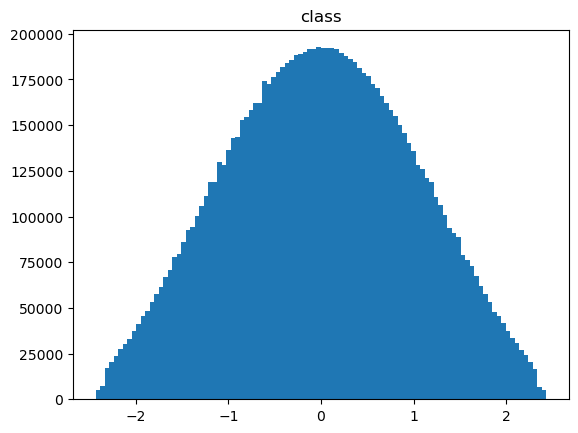

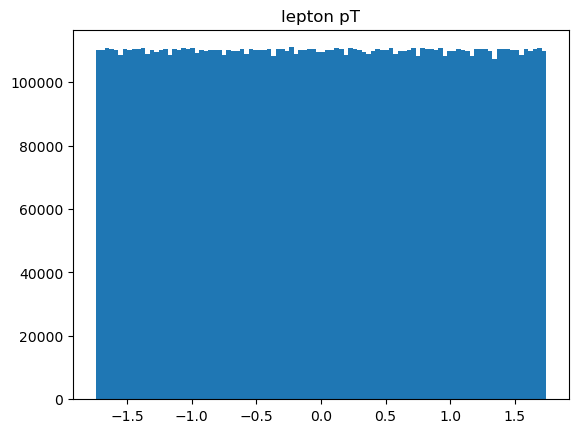

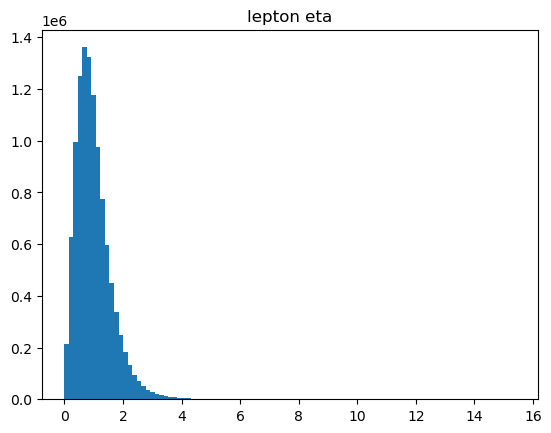

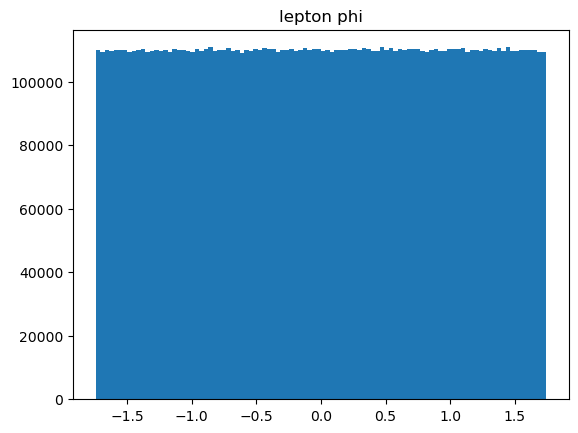

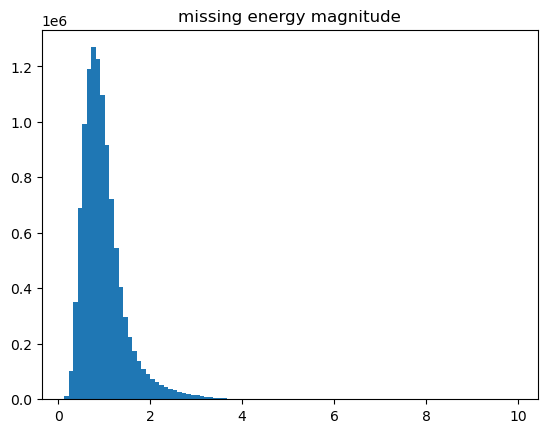

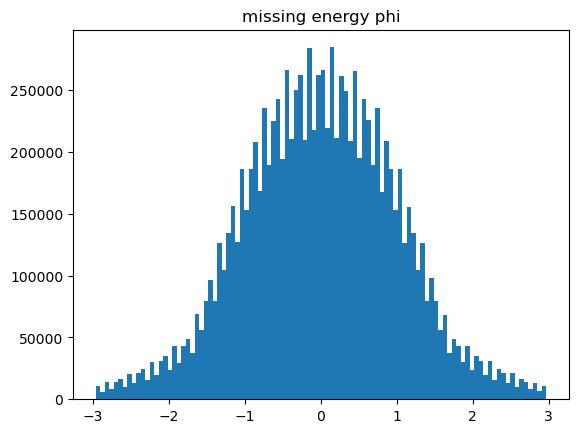

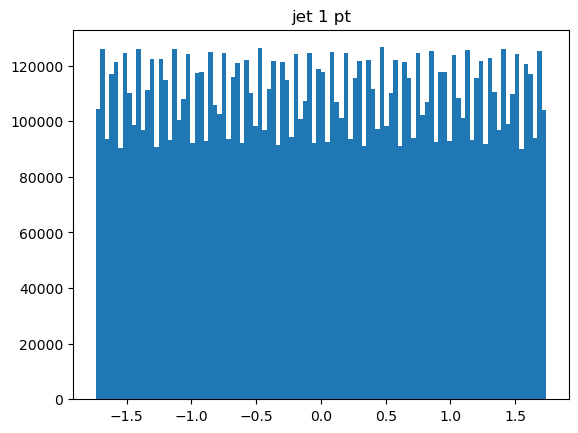

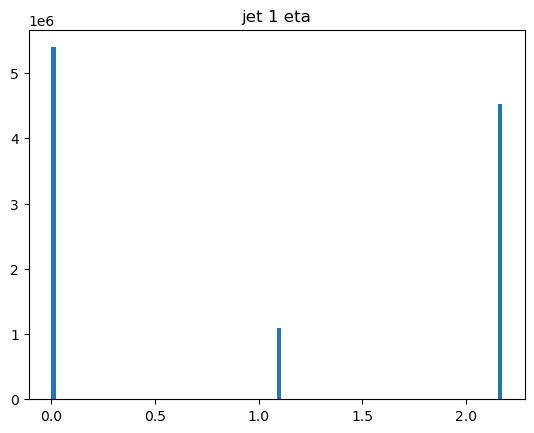

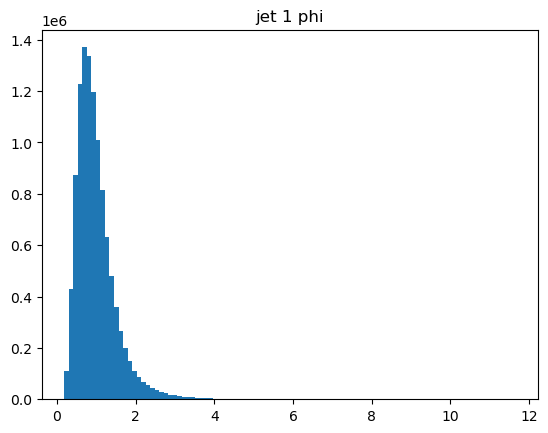

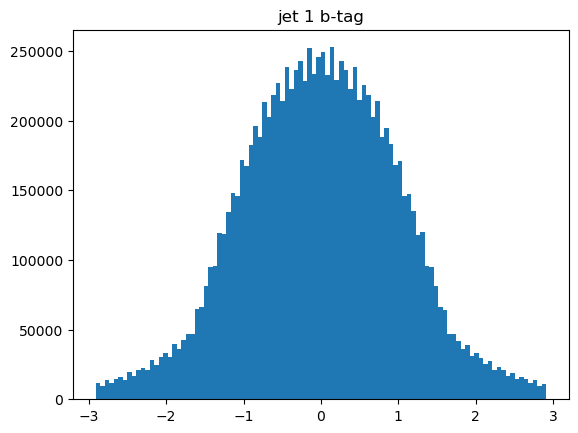

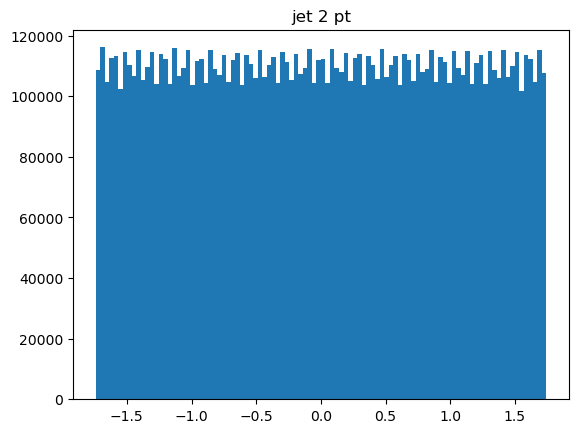

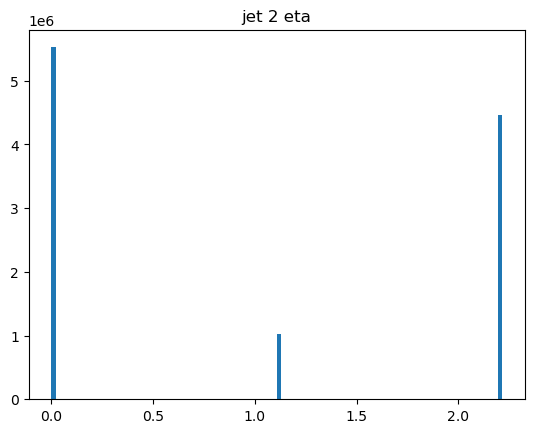

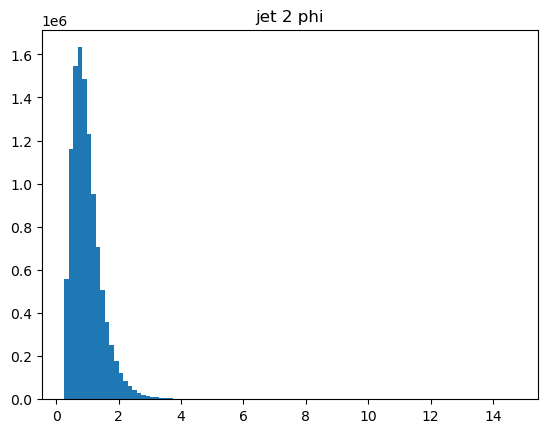

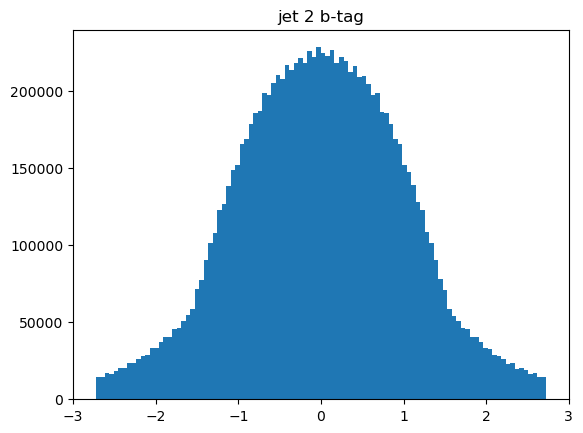

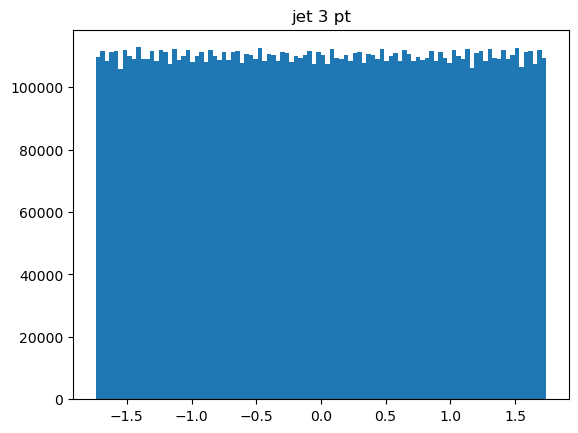

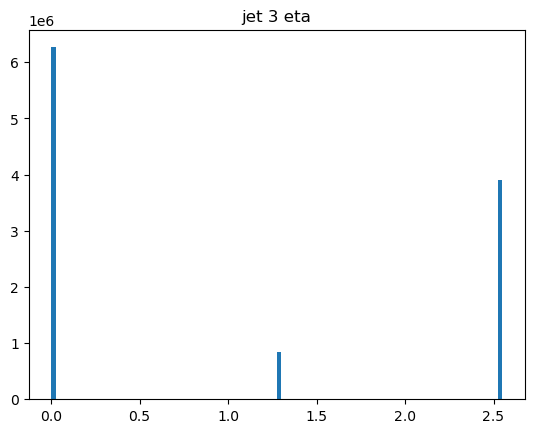

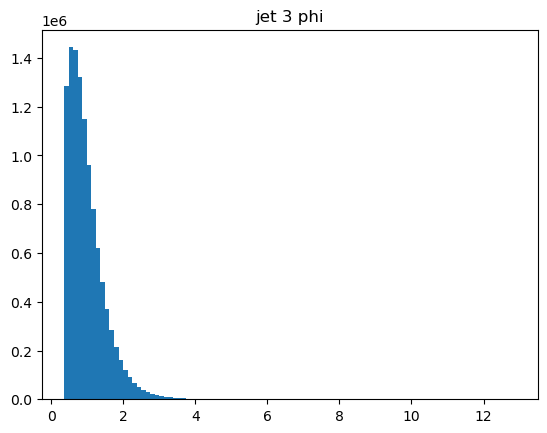

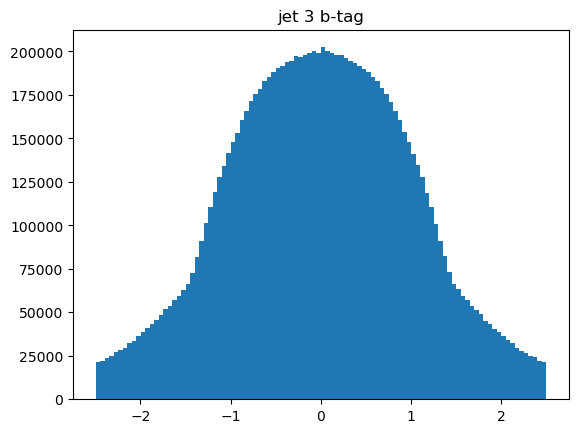

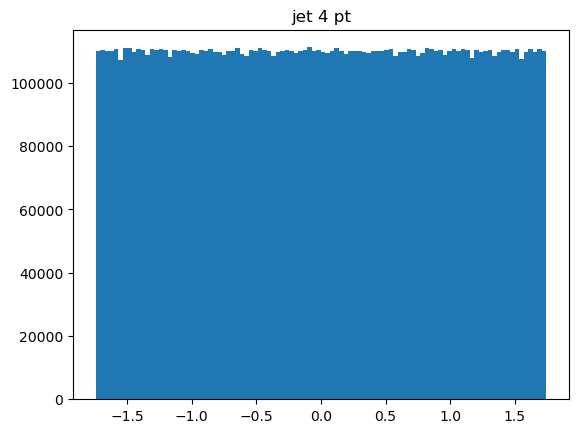

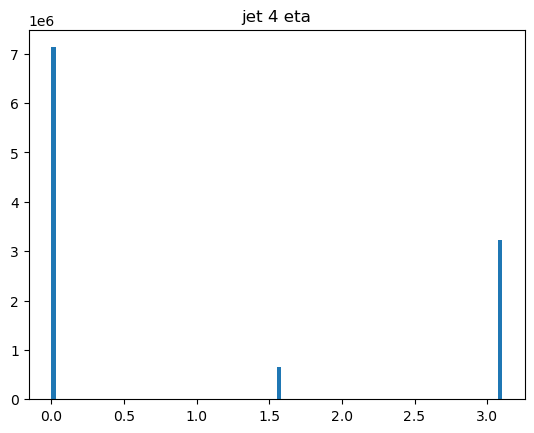

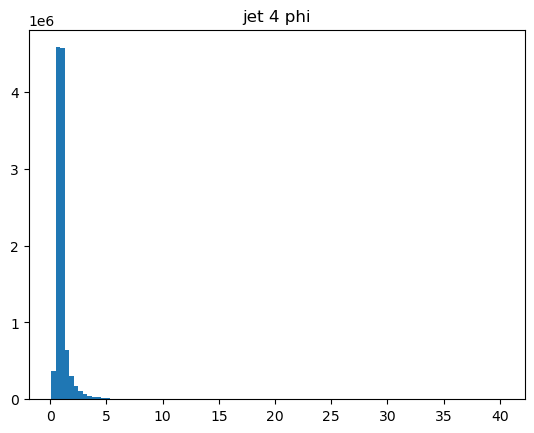

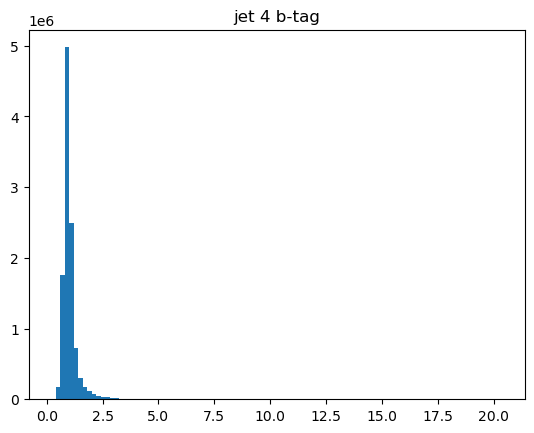

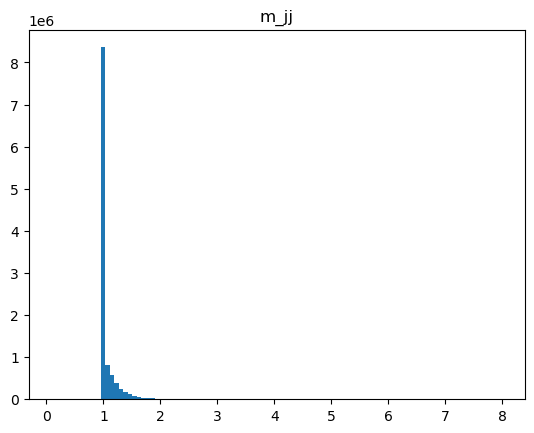

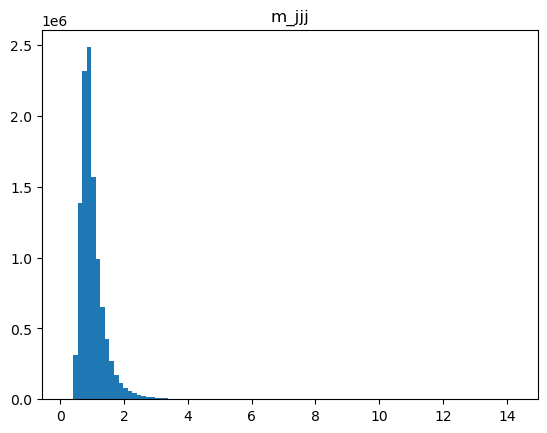

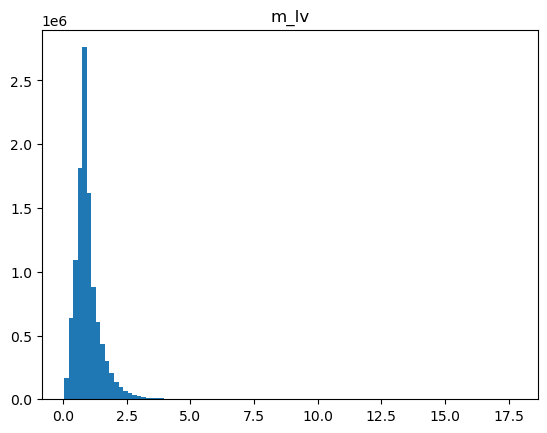

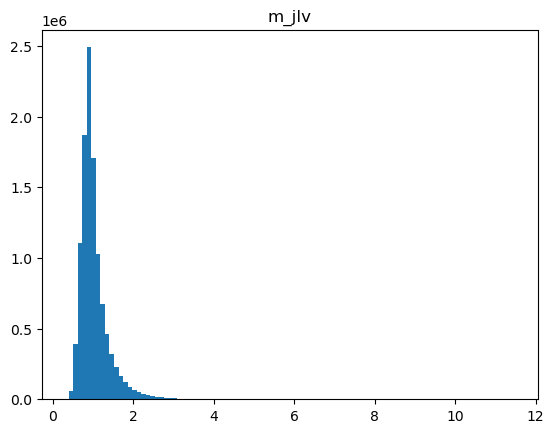

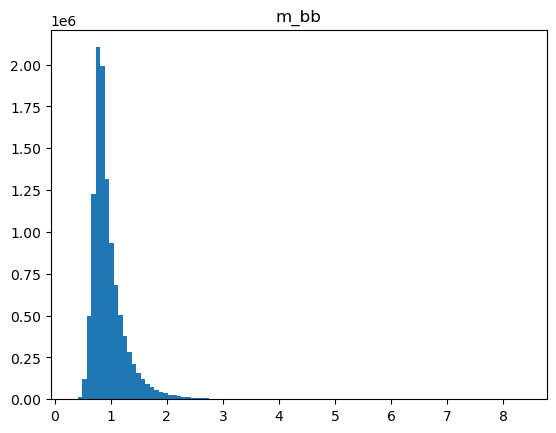

In [3]:
# Split the labels and the features
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
# Histograms for all 28 features
for i in range(1, 28):
    plt.hist(X.iloc[:, i], bins=100)
    plt.title(labels[i-1])
    plt.show()

### Some boxplots for the columns

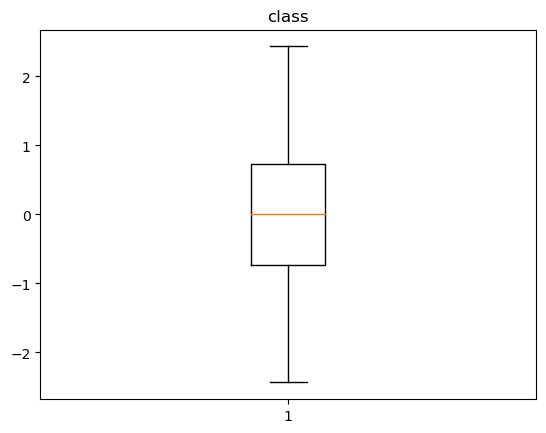

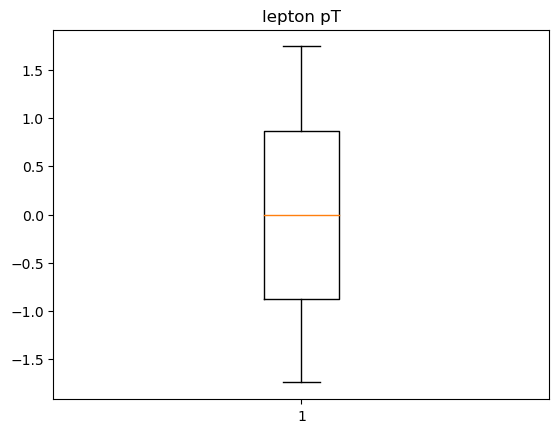

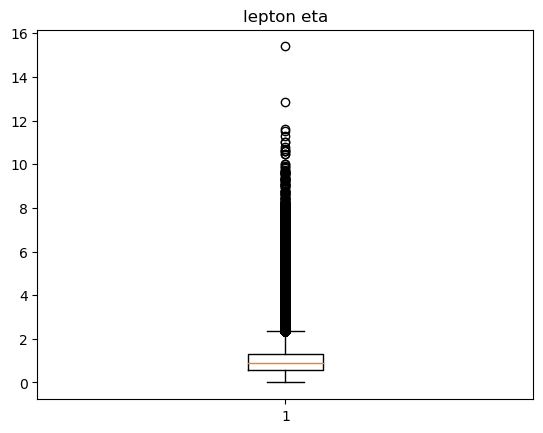

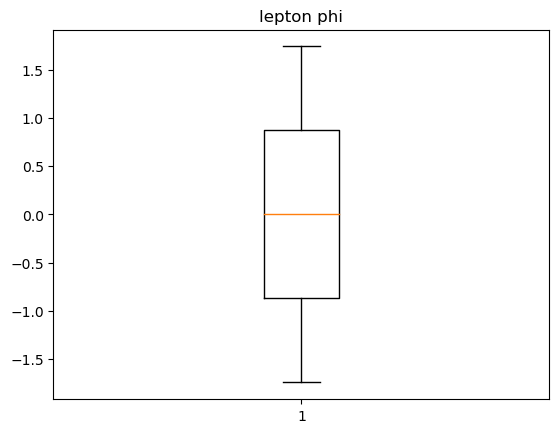

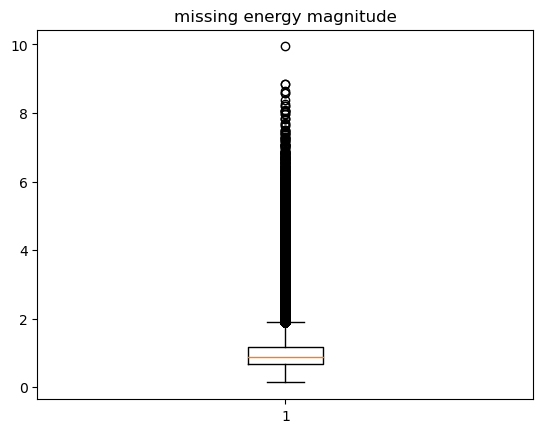

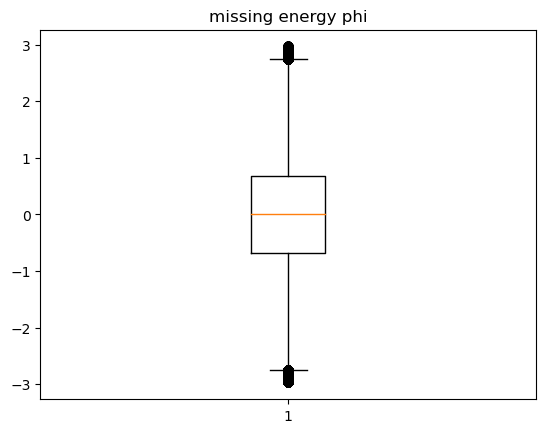

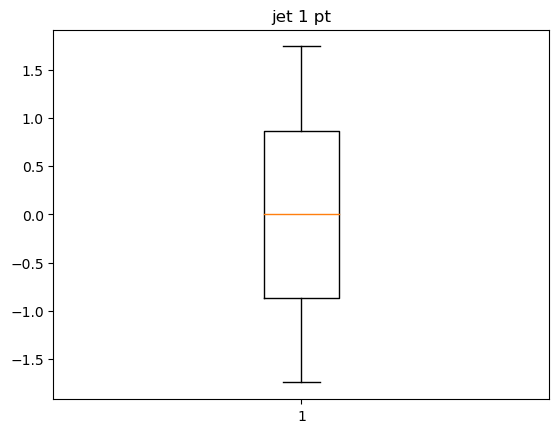

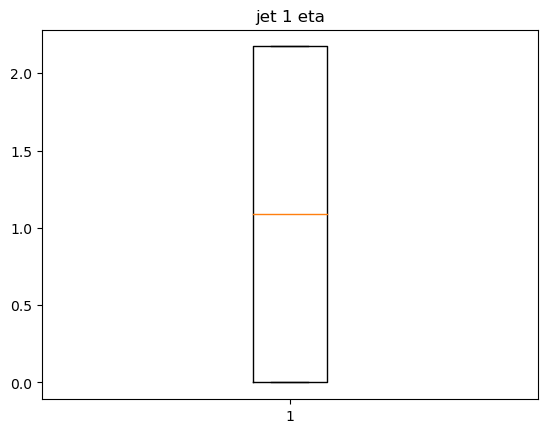

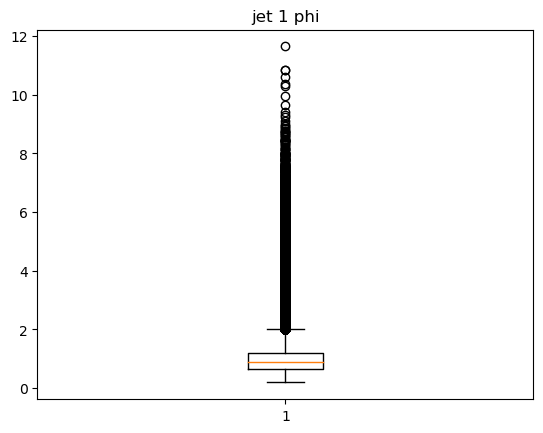

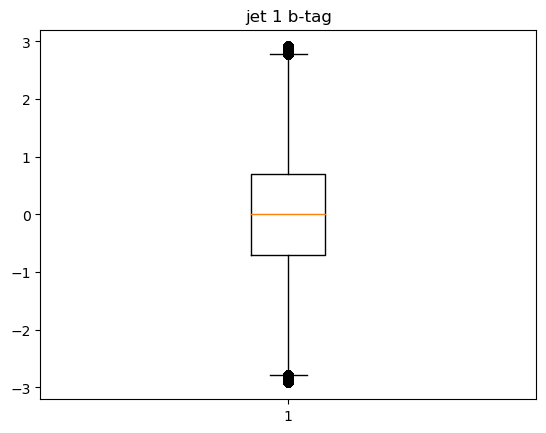

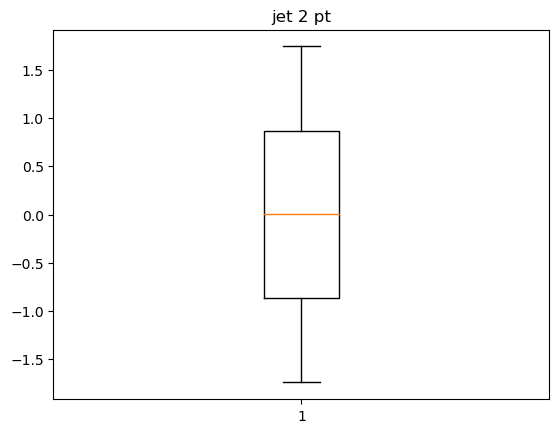

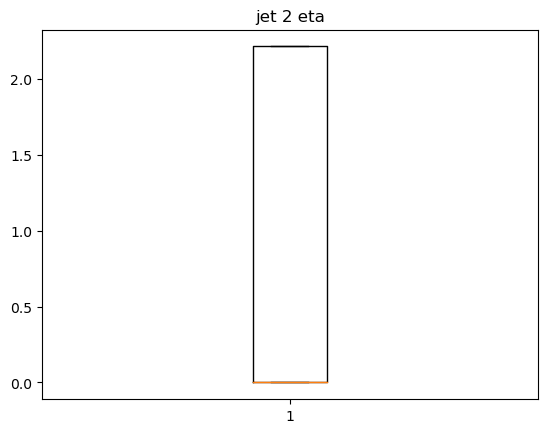

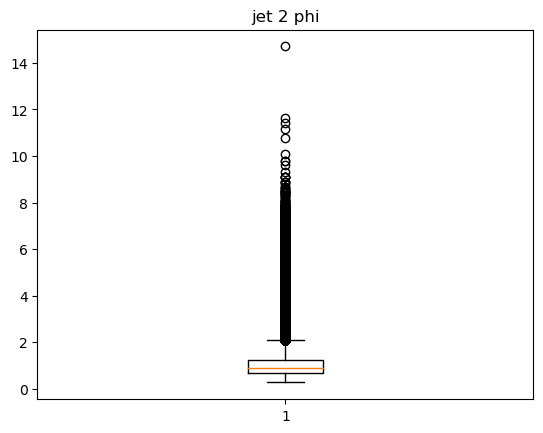

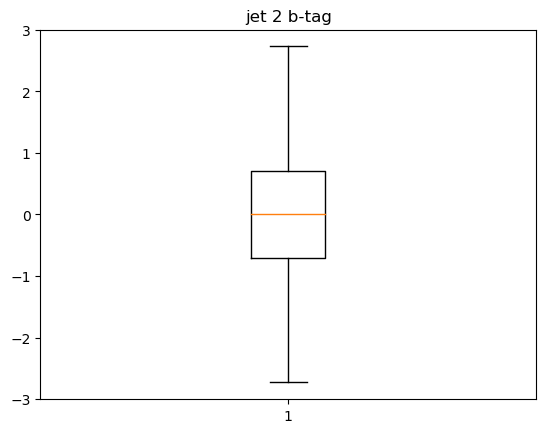

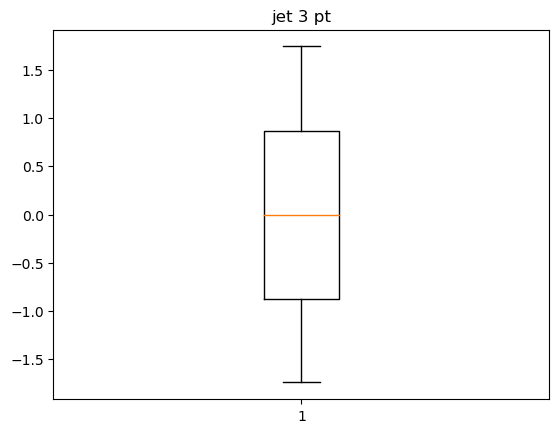

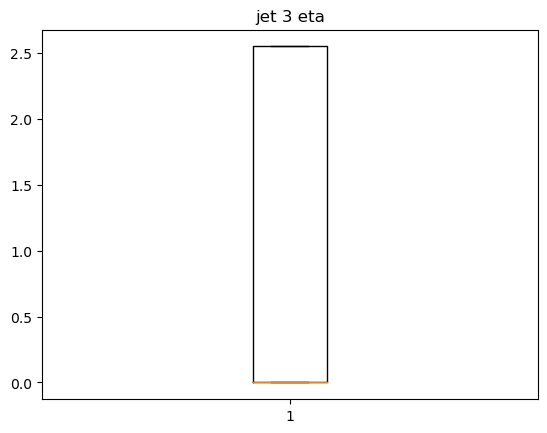

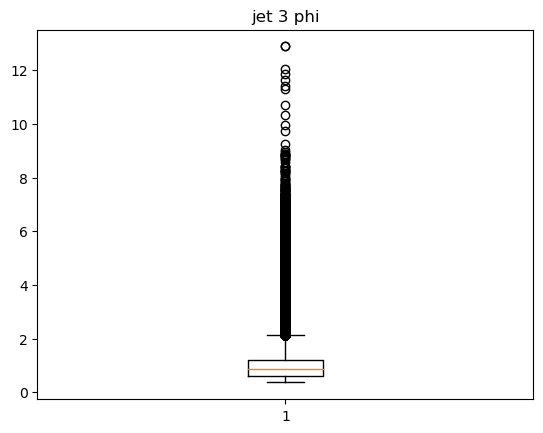

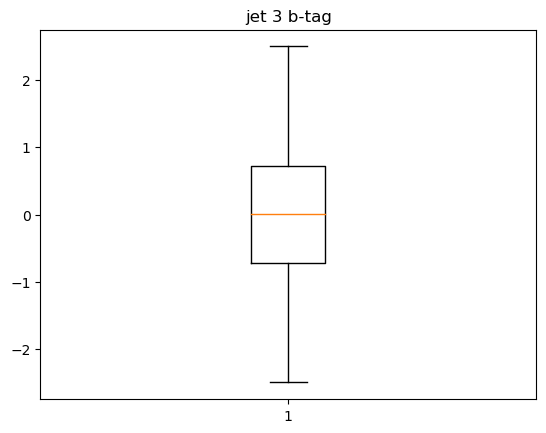

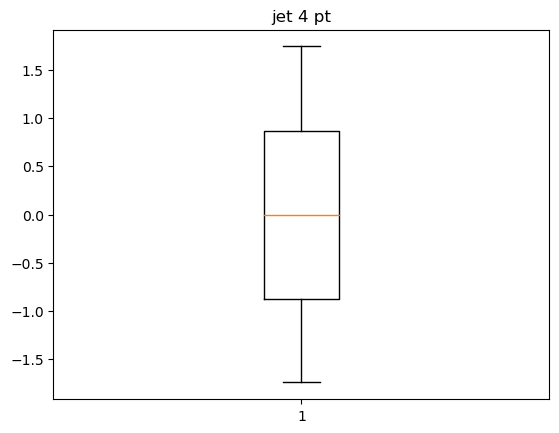

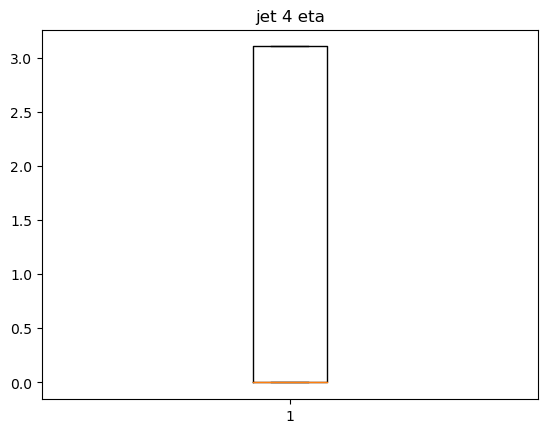

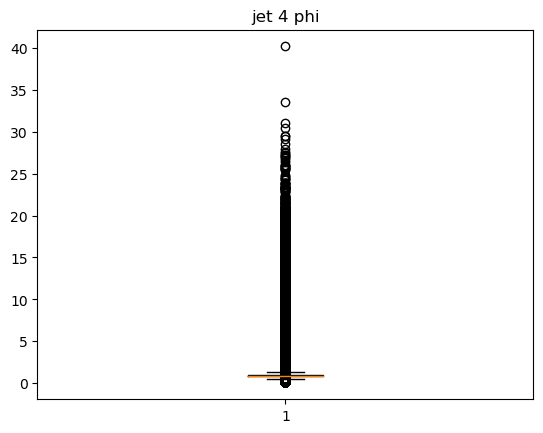

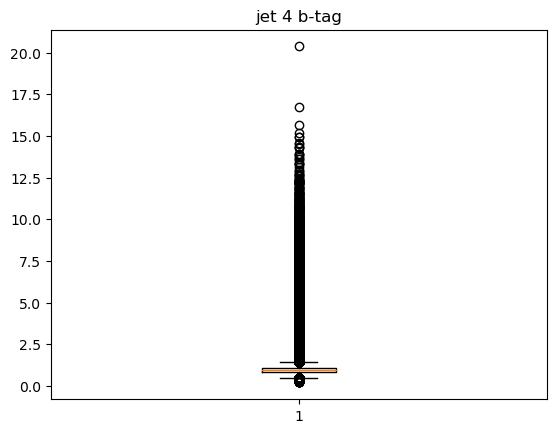

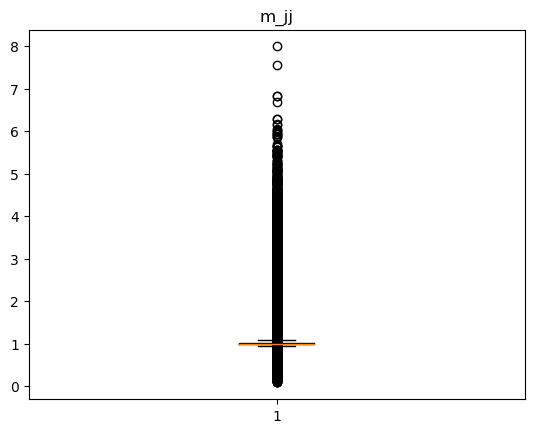

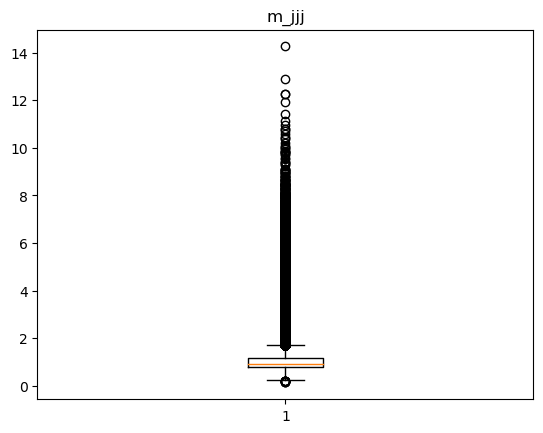

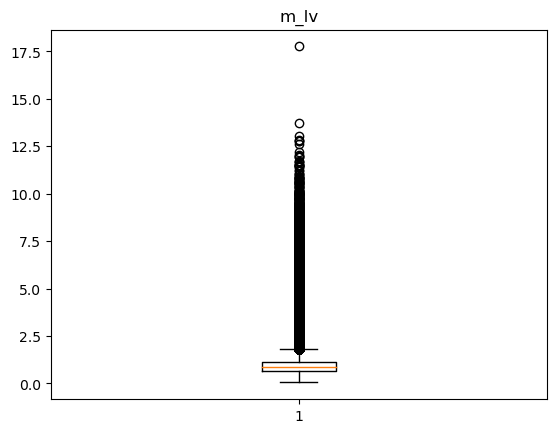

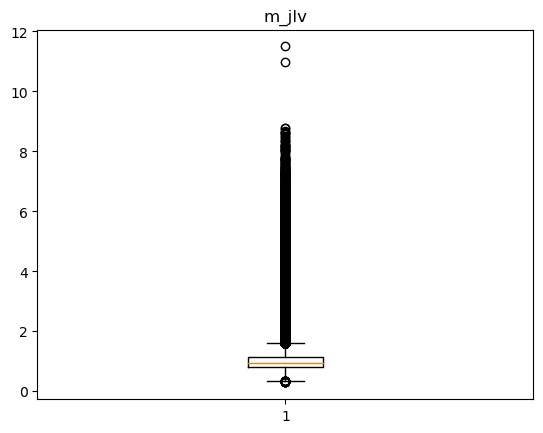

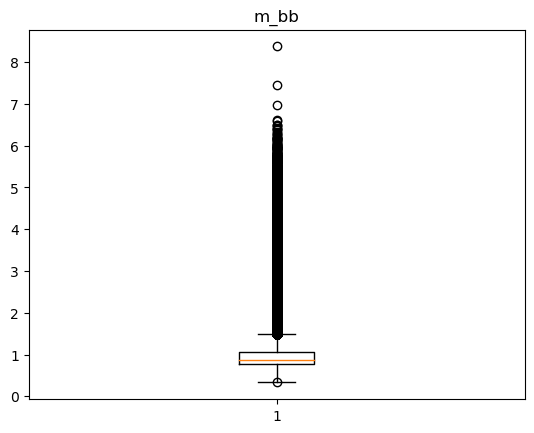

In [4]:
# Create a boxplot for each feature
for i in range(1, 28):
    plt.boxplot(X.iloc[:, i])
    plt.title(labels[i-1])
    plt.show()

### Correlation matrix

                          lepton pT  lepton eta  lepton phi  \
lepton pT                  1.000000   -0.000153   -0.000175   
lepton eta                -0.000153    1.000000    0.000418   
lepton phi                -0.000175    0.000418    1.000000   
missing energy magnitude  -0.139528   -0.000438   -0.000012   
missing energy phi         0.000232    0.000161   -0.044518   
jet 1 pt                   0.165798   -0.000396   -0.000135   
jet 1 eta                 -0.000135    0.264797    0.000793   
jet 1 phi                 -0.000335   -0.000187   -0.167880   
jet 1 b-tag               -0.006265    0.000275   -0.000178   
jet 2 pt                   0.004612    0.000123   -0.000241   
jet 2 eta                  0.000031    0.264615    0.000419   
jet 2 phi                  0.000071   -0.000418   -0.093681   
jet 2 b-tag               -0.005632   -0.000263    0.000027   
jet 3 pt                  -0.011190    0.000451   -0.000072   
jet 3 eta                  0.000571    0.226182    0.00

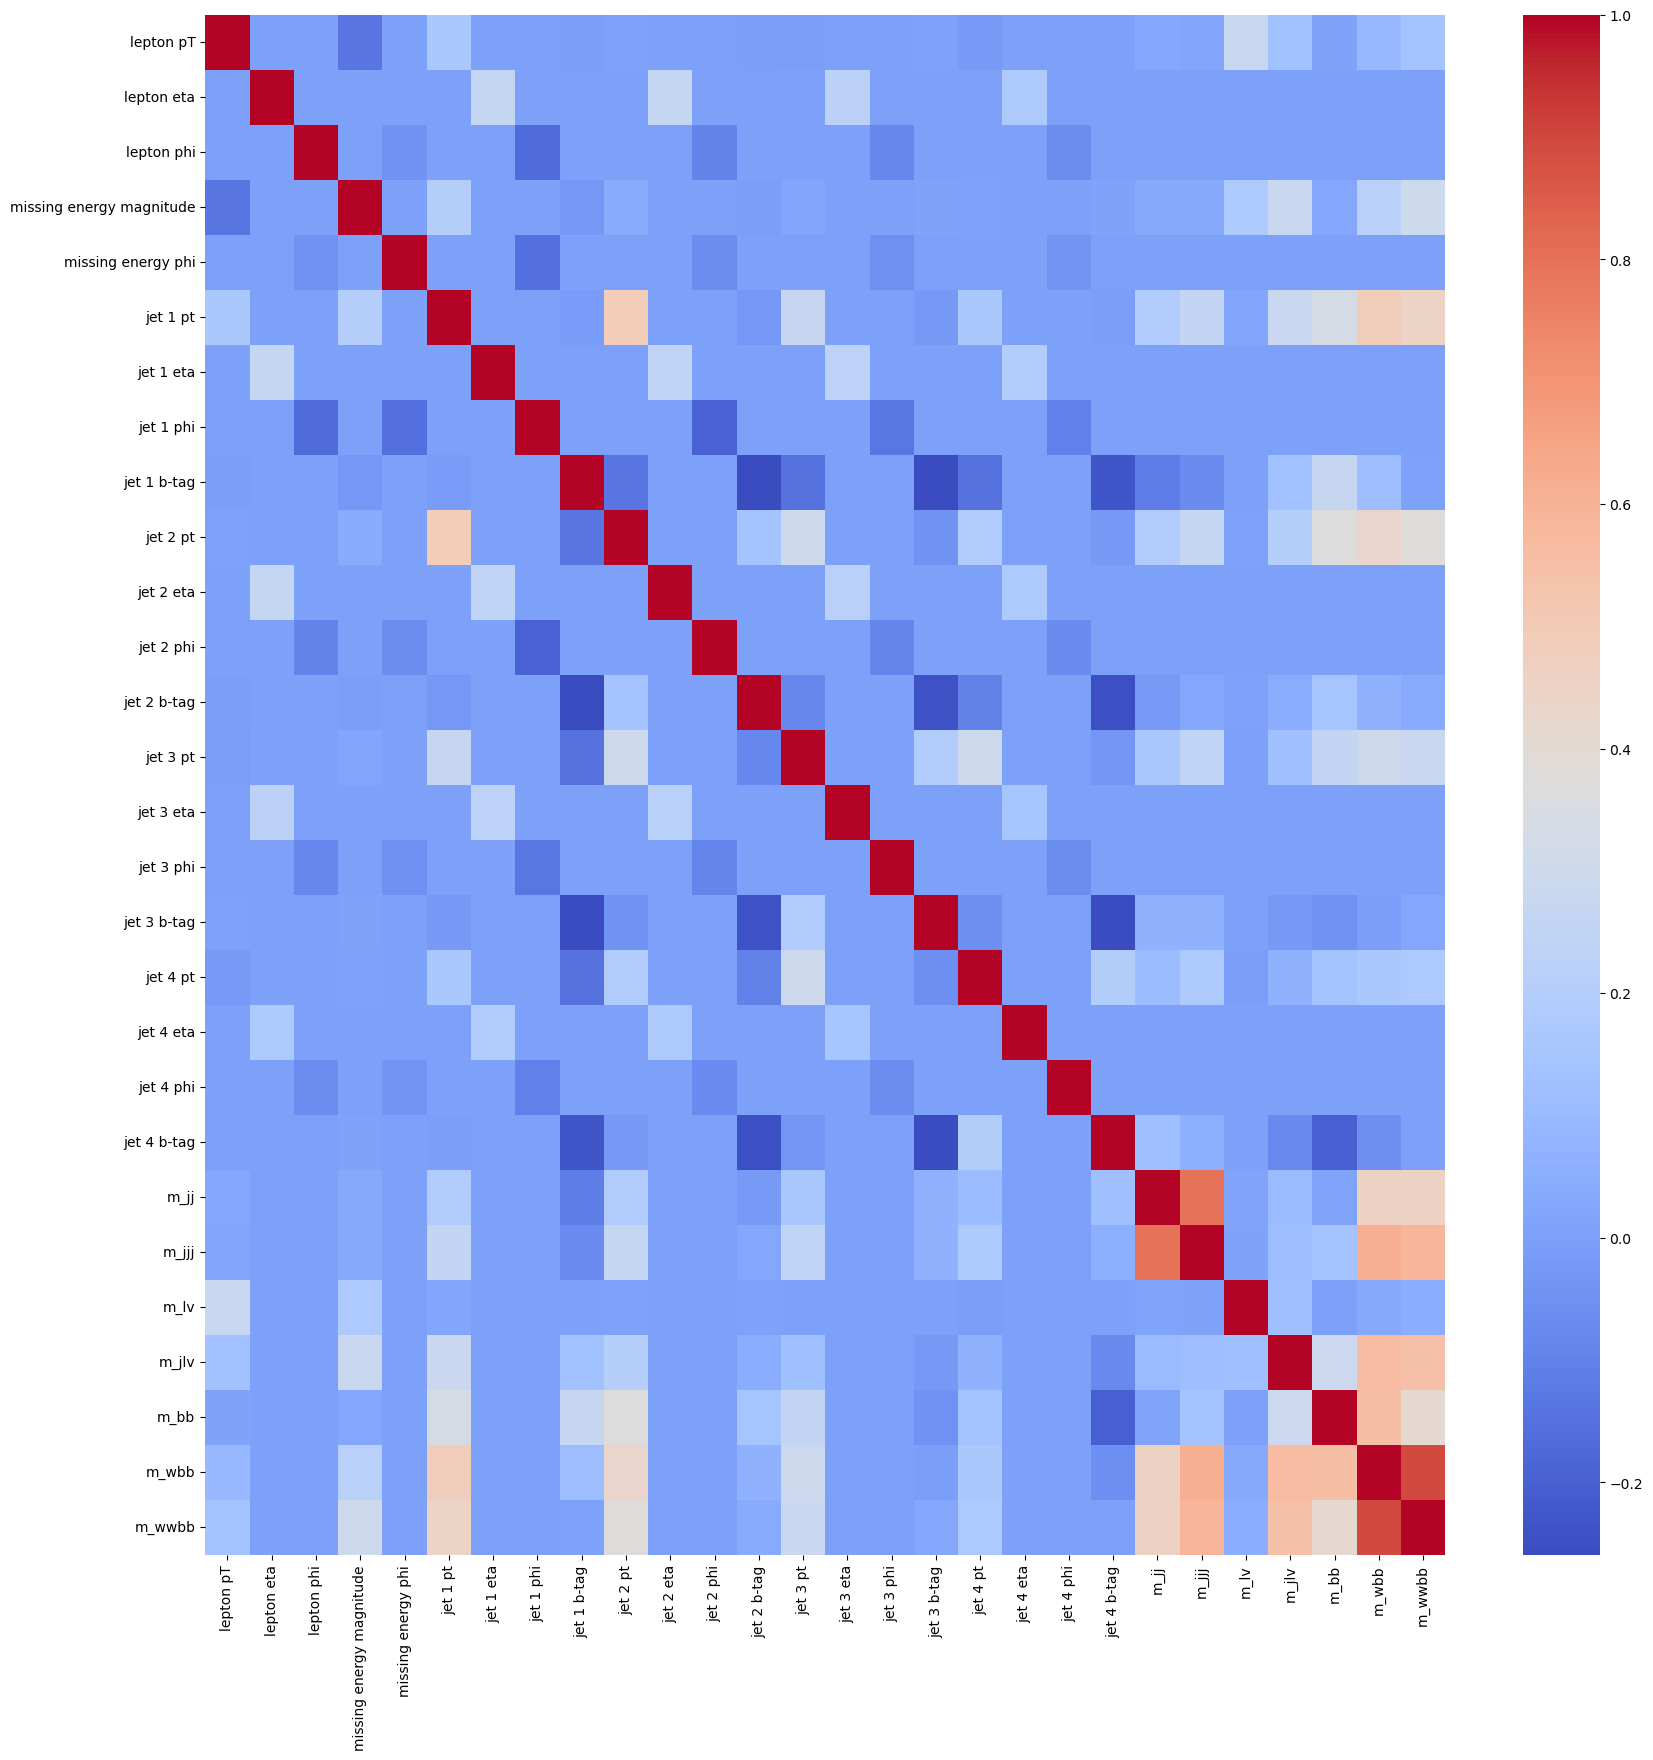

In [5]:
# Correlation matrix
correlation_matrix = X.corr()
print(correlation_matrix)
# The correlation matrix numbers are too long for the heatmap. Create a heatmap without the numbers
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()
# The last 7 columns are highly correlated with each other due to the fact that they are functions of the first 21 columns. 
# It will be important to look into how these functions are derived.

0.04209328718033388
                          lepton pT  lepton eta  lepton phi  \
lepton pT                       NaN         NaN         NaN   
lepton eta                      NaN         NaN         NaN   
lepton phi                      NaN         NaN         NaN   
missing energy magnitude        NaN         NaN         NaN   
missing energy phi              NaN         NaN         NaN   
jet 1 pt                   0.165798         NaN         NaN   
jet 1 eta                       NaN    0.264797         NaN   
jet 1 phi                       NaN         NaN         NaN   
jet 1 b-tag                     NaN         NaN         NaN   
jet 2 pt                        NaN         NaN         NaN   
jet 2 eta                       NaN    0.264615         NaN   
jet 2 phi                       NaN         NaN         NaN   
jet 2 b-tag                     NaN         NaN         NaN   
jet 3 pt                        NaN         NaN         NaN   
jet 3 eta                       NaN

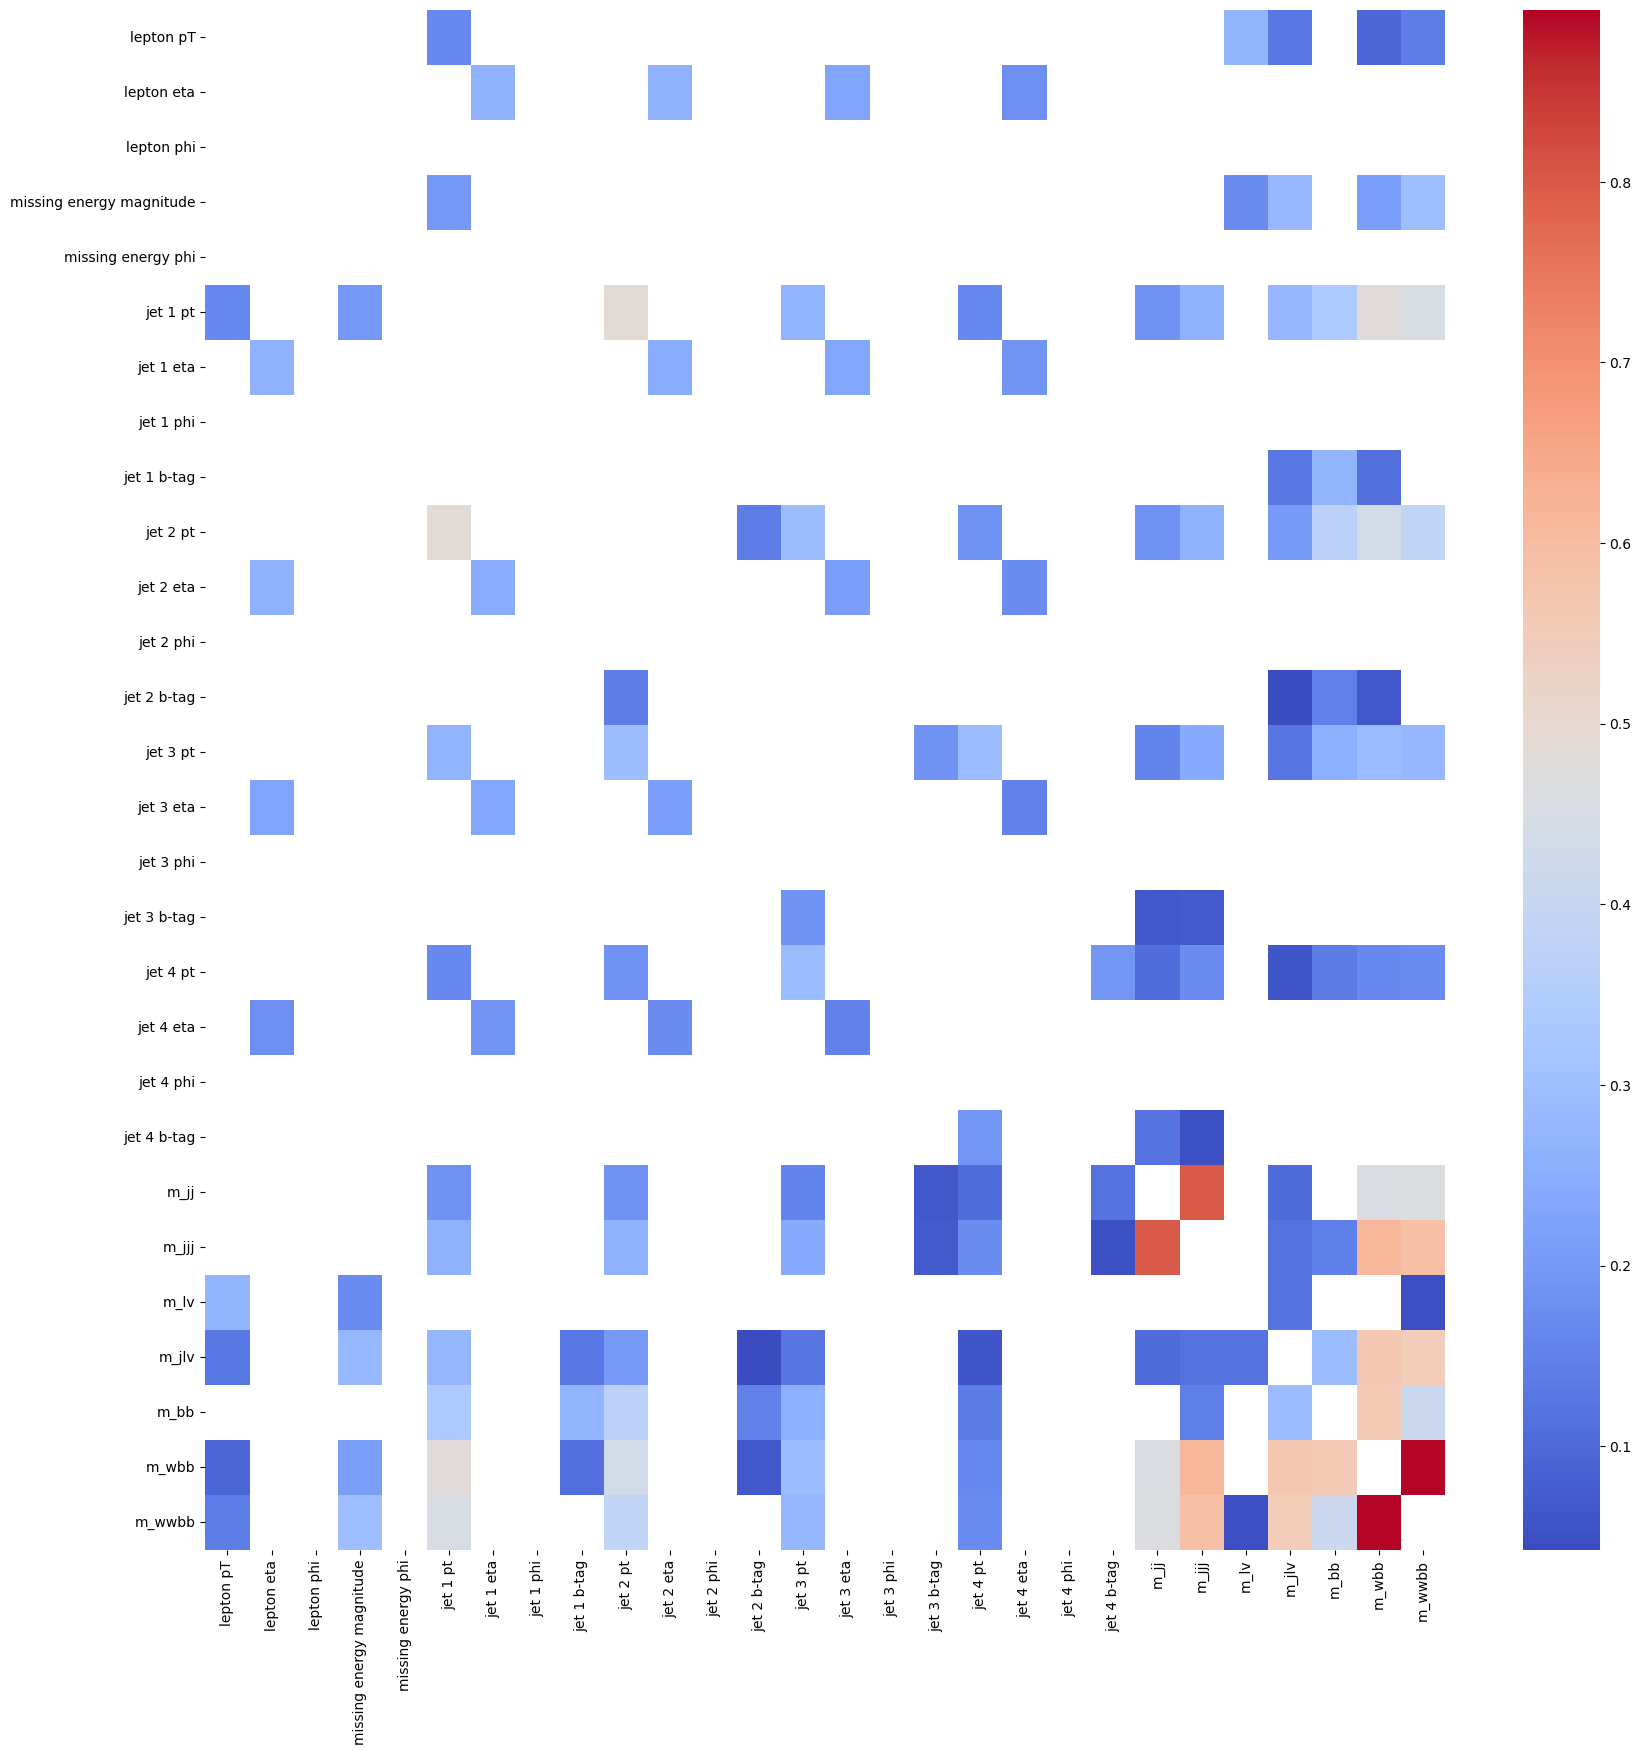

In [6]:
# Find the values that are more correlated than the mean
# Create a copy of the correlation matrix
highly_correlated = correlation_matrix
# Remove the diagonal line of the matrix
np.fill_diagonal(highly_correlated.values, np.nan)
# Find the mean of the correlation matrix
mean_correlation = highly_correlated.mean().mean()
print(mean_correlation)
# Lets print out the columns that are highly correlated with each other (above the mean)
highly_correlated = correlation_matrix[correlation_matrix > mean_correlation]
print(highly_correlated)
# How many values are above the mean?
print(highly_correlated.count().sum())
# Now we can visualize the correlation more easily by creating a heatmap of the highly correlated values
plt.figure(figsize=(20, 20))
sns.heatmap(highly_correlated, annot=False, cmap='coolwarm')
plt.show()


## Check out some pair plots and bar plots

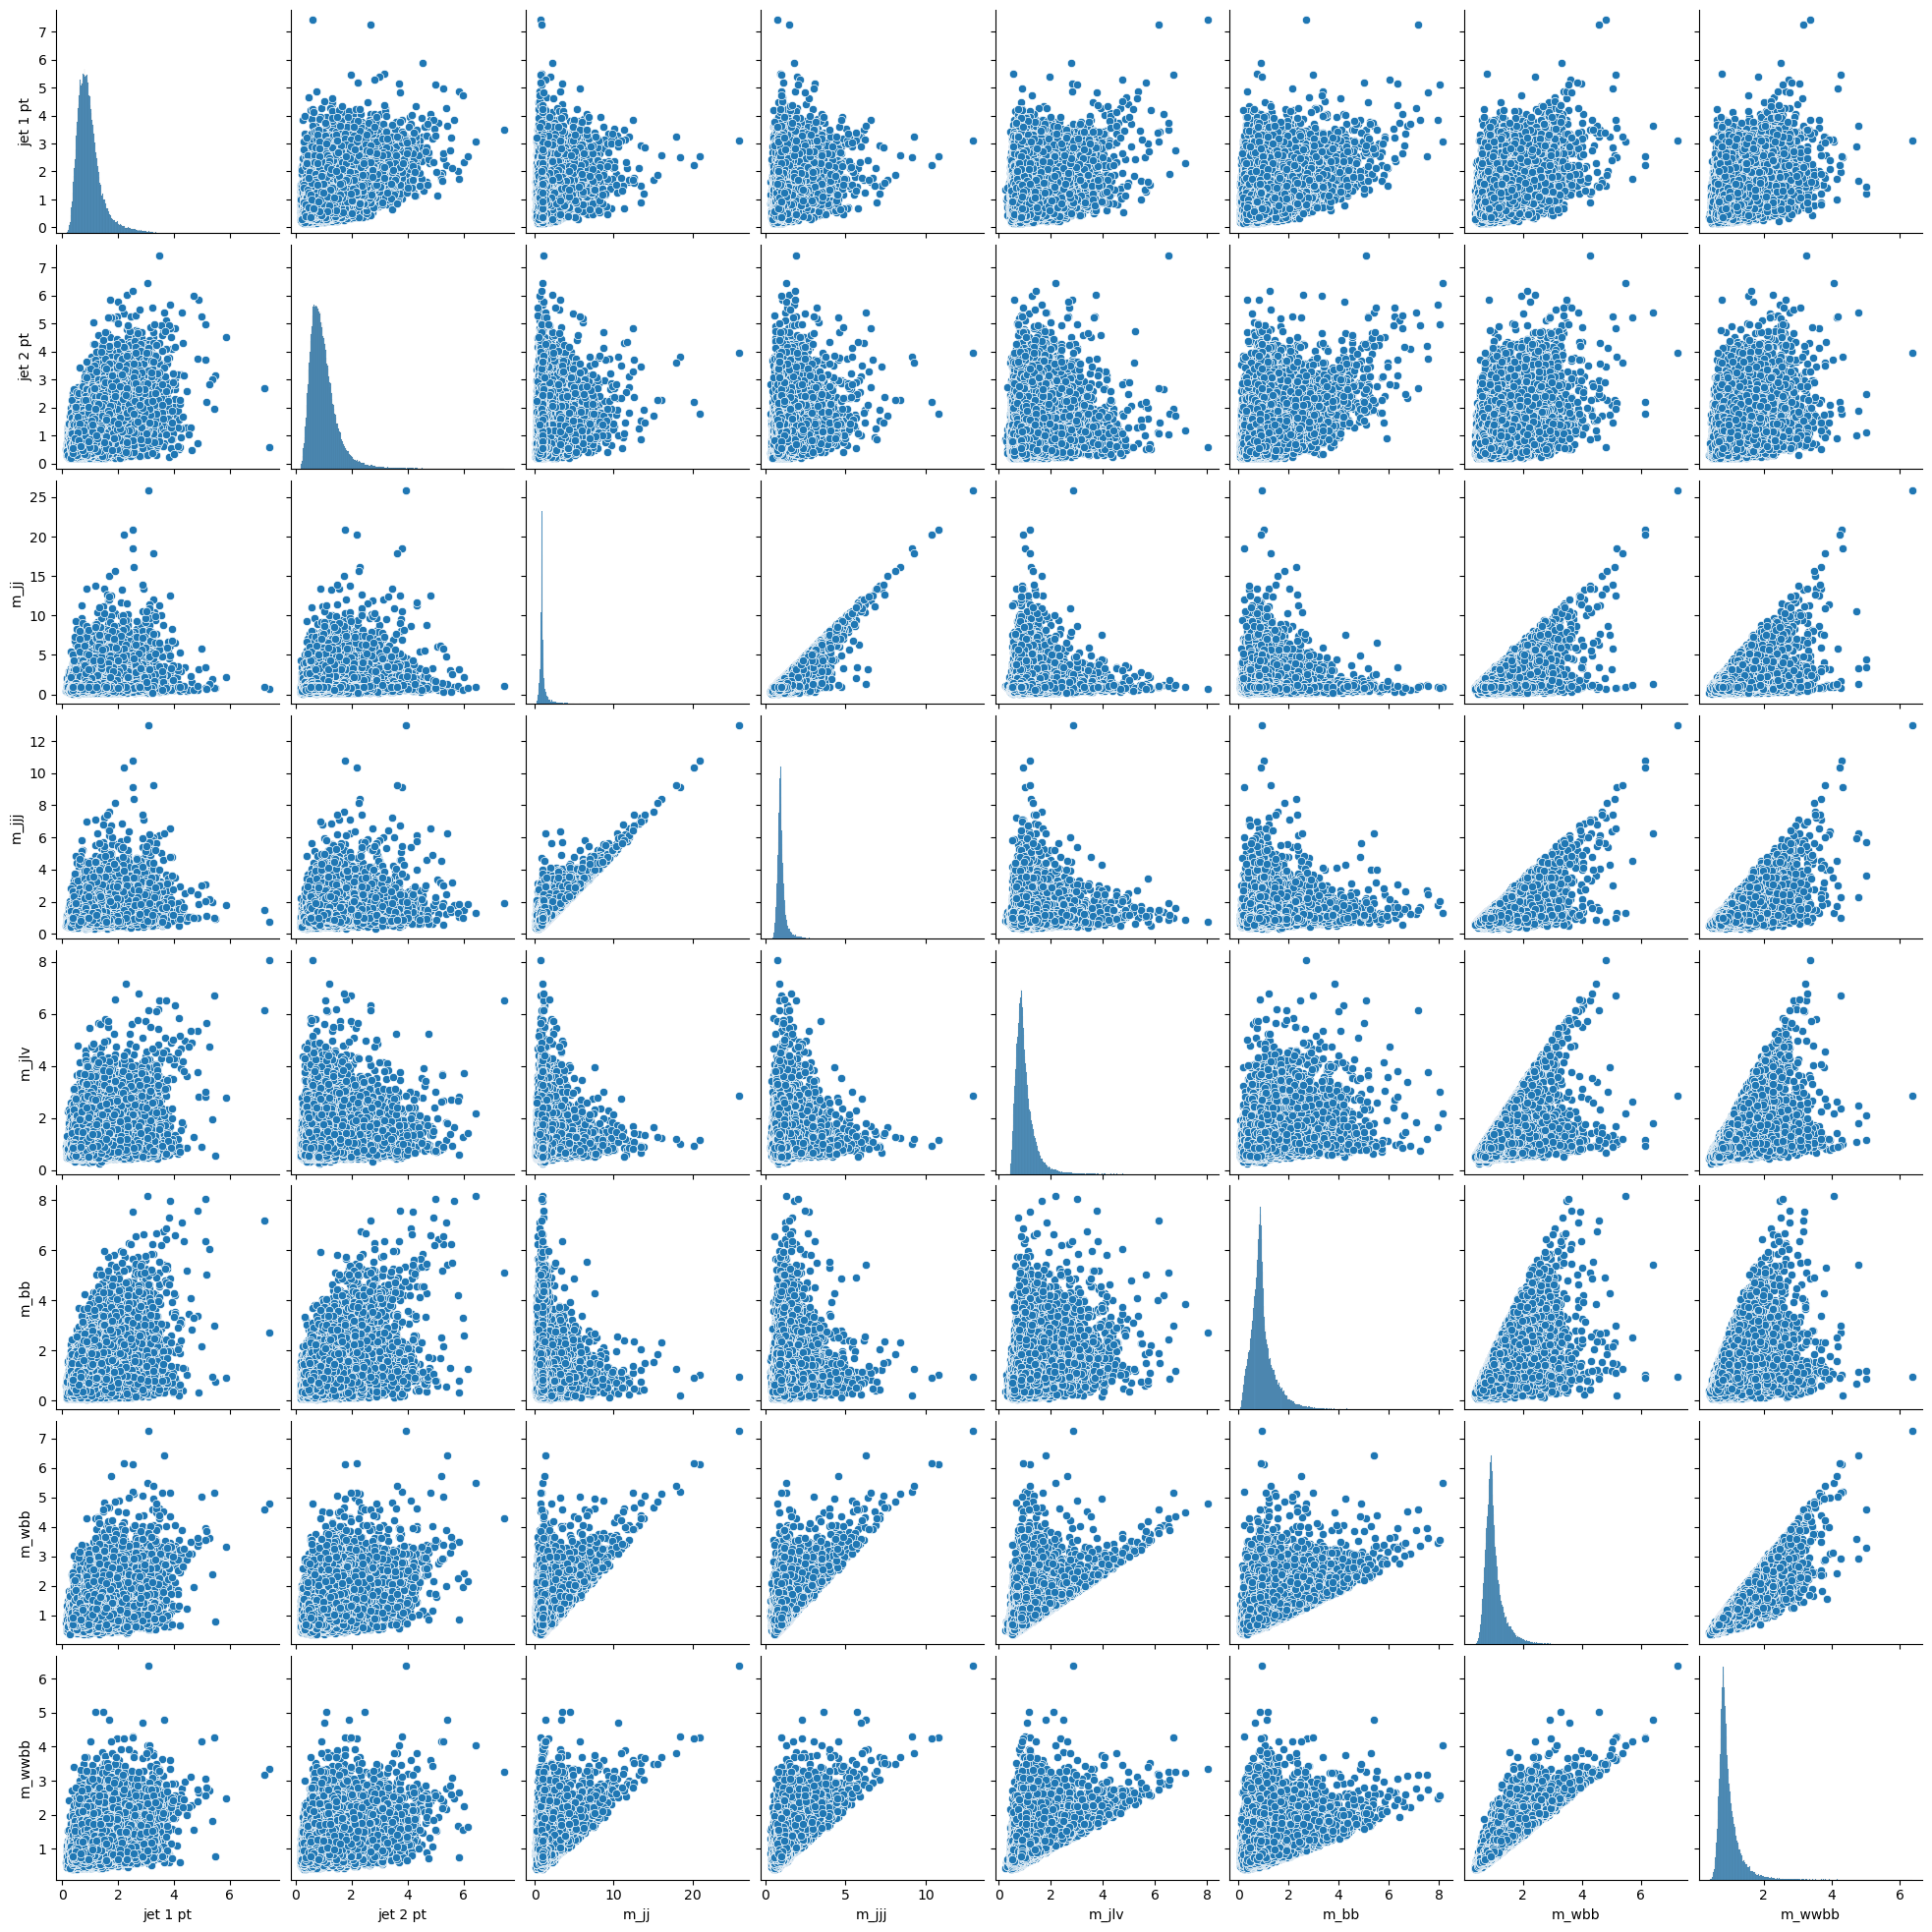

In [7]:
# Find columns where the maximum absolute correlation with other variables is below a threshold
low_corr_columns = correlation_matrix.columns[(correlation_matrix.abs().max() < 0.30).values] 
# Drop these columns from the correlation matrix
smaller_correlation_matrix = correlation_matrix.drop(low_corr_columns, axis=1).drop(low_corr_columns, axis=0)
# Use a smaller sample of X for the pairplot
X_sample = X.sample(100000)
# Create pairplot of the columns with the highest correlation
sns.pairplot(X_sample[smaller_correlation_matrix.columns])
plt.show()

## Split the dataset. This testing data will only be used to test the final two models

In [9]:
# Set aside 80% of the data for training and 20% for testing
train = dataset.sample(frac=0.8, random_state=200)
test = dataset.drop(train.index)
# Save the training and testing data to separate files
train.to_csv('HIGGS_train.csv', index=False)
test.to_csv('HIGGS_test.csv', index=False)
